<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week12/GWAS_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example edited from Hail tutorial: https://hail.is/docs/0.2/tutorials/01-genome-wide-association-study.html

## Hail setup and initialization

In [2]:
pip install hail

     |████████████████████████████████| 95.1 MB 55 kB/s 
     |████████████████████████████████| 131 kB 67.4 MB/s 
     |████████████████████████████████| 345 kB 67.7 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 107 kB 53.7 MB/s 
     |████████████████████████████████| 249 kB 57.5 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████████████████| 135 kB 72.4 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 1.3 MB 44.7 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
     |████████████████████████████████| 9.5 MB 29.9 MB/s 
     |████████████████████████████████| 8.4 MB 25.1 MB/s 
     |████████████████████████████████| 51 kB 579 kB/s 
     |████████████████████████████████| 32.4 MB 1.7 MB/s 
     |████████████████████████████████| 108 kB 55.2 MB/s 
     |█████████████████████

In [1]:
import hail as hl
hl.init()

Running on Apache Spark version 3.1.2
SparkUI available at http://f1f5c6322c57:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.79-f141af259254
LOGGING: writing to /content/hail-20211208-1158-0.2.79-f141af259254.log


In [2]:
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()

##  Download public 1000 Genomes data and attributes


In [4]:
# download the entire data example folder
hl.utils.get_1kg('data/')

2021-12-08 11:19:42 Hail: INFO: downloading 1KG VCF ...
  Source: https://storage.googleapis.com/hail-tutorial/1kg.vcf.bgz
2021-12-08 11:19:42 Hail: INFO: importing VCF and writing to matrix table...
2021-12-08 11:19:52 Hail: INFO: Coerced sorted dataset
2021-12-08 11:20:02 Hail: INFO: wrote matrix table with 10879 rows and 284 columns in 16 partitions to data/1kg.mt
2021-12-08 11:20:02 Hail: INFO: downloading 1KG annotations ...
  Source: https://storage.googleapis.com/hail-tutorial/1kg_annotations.txt
2021-12-08 11:20:02 Hail: INFO: downloading Ensembl gene annotations ...
  Source: https://storage.googleapis.com/hail-tutorial/ensembl_gene_annotations.txt
2021-12-08 11:20:03 Hail: INFO: Done!


### The VCF format

The Variant Call Format contains info on the quality of the variant reads, patient by patient genotype


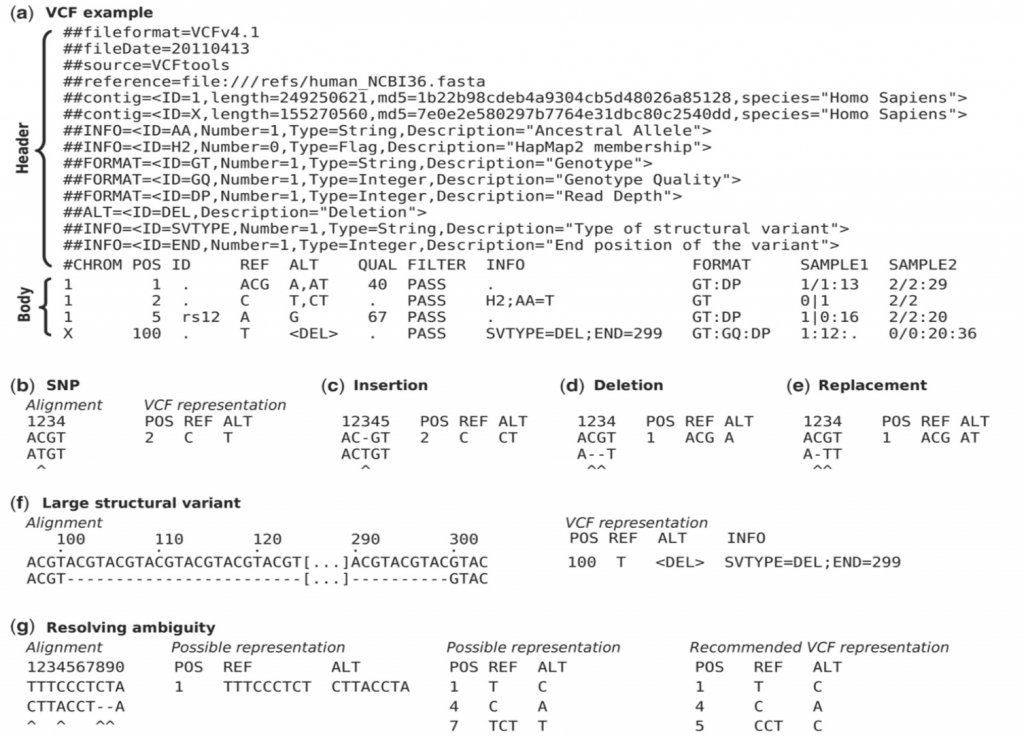

In [3]:
# import VCF files (genotype data) and save it as a matrix table

# VCF files are used to store genetic data from multiple individuals

hl.import_vcf('data/1kg.vcf.bgz').write('data/1kg.mt', overwrite=True)
# upload the matrix table
mt = hl.read_matrix_table('data/1kg.mt')

2021-12-08 11:58:26 Hail: INFO: Coerced sorted dataset
2021-12-08 11:58:37 Hail: INFO: wrote matrix table with 10879 rows and 284 columns in 1 partition to data/1kg.mt


In [4]:
mt.GT.show()

,,,,,
,,'HG00096','HG00099','HG00105','HG00118'
locus,alleles,GT,GT,GT,GT
locus<GRCh37>,array<str>,call,call,call,call
1:904165,"[""G"",""A""]",0/0,0/0,0/0,0/0
1:909917,"[""G"",""A""]",0/0,0/0,0/0,0/0
1:986963,"[""C"",""T""]",0/0,0/0,0/0,0/0
1:1563691,"[""T"",""G""]",NA,0/0,0/0,0/0
1:1707740,"[""T"",""G""]",0/1,0/1,0/1,0/0
1:2252970,"[""C"",""T""]",0/0,NA,0/0,0/0
1:2284195,"[""T"",""C""]",1/1,0/1,0/1,0/1


In [5]:
# look at SNPs

mt.rows().select().show(5)

,
locus,alleles
locus<GRCh37>,array<str>
1:904165,"[""G"",""A""]"
1:909917,"[""G"",""A""]"
1:986963,"[""C"",""T""]"
1:1563691,"[""T"",""G""]"
1:1707740,"[""T"",""G""]"


In [12]:
# look at sample ID
mt.s.show(5)

""
s
str
"""HG00096"""
"""HG00099"""
"""HG00105"""
"""HG00118"""
"""HG00129"""


In [32]:
mt.count_cols()

284

In [48]:
# DP is the read depth (number of short reads spanning a position for a given sample). 

mt.DP.summarize()


Non-missing,2599879 (100.00%)
Missing,0
Minimum,1
Maximum,68
Mean,7.54
Std Dev,4.14


In [9]:
# read depth summary plot
p = hl.plot.histogram(mt.DP, range=(0,30), bins=30, title='DP Histogram', legend='DP')
show(p)

In [49]:
# AD is the array of allelic depth per allele at a called genotype.  
mt.AD.summarize()

Non-missing,2599879 (100.00%)
Missing,0
Min Size,2
Max Size,2
Mean Size,2.00
Non-missing,5199758 (100.00%)
Missing,0
Minimum,0
Maximum,68
Mean,3.77
Std Dev,4.29


## import table with annotations

In [6]:
table = (hl.import_table('data/1kg_annotations.txt', impute=True)
         .key_by('Sample'))

2021-12-08 11:58:44 Hail: INFO: Reading table to impute column types
2021-12-08 11:58:45 Hail: INFO: Finished type imputation
  Loading field 'Sample' as type str (imputed)
  Loading field 'Population' as type str (imputed)
  Loading field 'SuperPopulation' as type str (imputed)
  Loading field 'isFemale' as type bool (imputed)
  Loading field 'PurpleHair' as type bool (imputed)
  Loading field 'CaffeineConsumption' as type int32 (imputed)


In [24]:
table.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Row fields:
    'Sample': str 
    'Population': str 
    'SuperPopulation': str 
    'isFemale': bool 
    'PurpleHair': bool 
    'CaffeineConsumption': int32 
----------------------------------------
Key: ['Sample']
----------------------------------------


In [25]:
table.show(width=100)

,,,,,
Sample,Population,SuperPopulation,isFemale,PurpleHair,CaffeineConsumption
str,str,str,bool,bool,int32
"""HG00096""","""GBR""","""EUR""",False,False,4
"""HG00097""","""GBR""","""EUR""",True,True,4
"""HG00098""","""GBR""","""EUR""",False,False,5
"""HG00099""","""GBR""","""EUR""",True,False,4
"""HG00100""","""GBR""","""EUR""",True,False,5
"""HG00101""","""GBR""","""EUR""",False,True,1
"""HG00102""","""GBR""","""EUR""",True,True,6
"""HG00103""","""GBR""","""EUR""",False,True,5


In [29]:
# explore the attribute table
pprint(table.aggregate(hl.agg.counter(table.SuperPopulation)))

frozendict({'AFR': 1018, 'AMR': 535, 'EAS': 617, 'EUR': 669, 'SAS': 661})


In [30]:
pprint(table.aggregate(hl.agg.stats(table.CaffeineConsumption)))

{'max': 10.0,
 'mean': 3.9837142857142855,
 'min': -1.0,
 'n': 3500,
 'stdev': 1.7021055628070711,
 'sum': 13943.0}


In [31]:
table.count()

3500

### Merge the attribute and genotype columns

In [26]:
print(mt.col.dtype)

struct{s: str}


In [7]:
# this joins the matrix table with the annotation table
mt = mt.annotate_cols(pheno = table[mt.s])

In [8]:
mt.col.describe()

--------------------------------------------------------
Type:
        struct {
        s: str, 
        pheno: struct {
            Population: str, 
            SuperPopulation: str, 
            isFemale: bool, 
            PurpleHair: bool, 
            CaffeineConsumption: int32
        }
    }
--------------------------------------------------------
Source:
Index:
    ['column']
--------------------------------------------------------


In [33]:
mt.aggregate_cols(hl.agg.counter(mt.pheno.SuperPopulation))

frozendict({'AFR': 76, 'AMR': 34, 'EAS': 72, 'EUR': 47, 'SAS': 55})

In [34]:
pprint(mt.aggregate_cols(hl.agg.stats(mt.pheno.CaffeineConsumption)))


{'max': 9.0,
 'mean': 4.415492957746479,
 'min': 0.0,
 'n': 284,
 'stdev': 1.577763427465917,
 'sum': 1254.0}


In [35]:
# count how many SNP alternative allele genotypes
snp_counts = mt.aggregate_rows(hl.agg.counter(hl.Struct(ref=mt.alleles[0], alt=mt.alleles[1])))
pprint(snp_counts)

frozendict({Struct(ref='A', alt='C'): 451, Struct(ref='A', alt='G'): 1929, Struct(ref='A', alt='T'): 75, Struct(ref='C', alt='A'): 494, Struct(ref='C', alt='G'): 150, Struct(ref='C', alt='T'): 2418, Struct(ref='G', alt='A'): 2367, Struct(ref='G', alt='C'): 111, Struct(ref='G', alt='T'): 477, Struct(ref='T', alt='A'): 77, Struct(ref='T', alt='C'): 1864, Struct(ref='T', alt='G'): 466})


### Filter samples based on quality control

In [11]:
# automatic sample quality control based on best practices
mt = hl.sample_qc(mt)

In [12]:
# Call rate is the proportion of individuals for which the corresponding SNP information is not missing
p = hl.plot.histogram(mt.sample_qc.call_rate, range=(.88,1), legend='Call Rate')
show(p)

In [41]:
# plot genotype quality
p = hl.plot.histogram(mt.sample_qc.gq_stats.mean, range=(10,70), legend='Mean Sample GQ')
show(p)

In [13]:
# filter for call rate and read depth
mt = mt.filter_cols((mt.sample_qc.dp_stats.mean >= 4) & (mt.sample_qc.call_rate >= 0.97))
print('After filter, %d/284 samples remain.' % mt.count_cols())

After filter, 250/284 samples remain.


In [44]:
# filters based on called genotypes (homo reference are actually reference, and so on)

ab = mt.AD[1] / hl.sum(mt.AD)

filter_condition_ab = ((mt.GT.is_hom_ref() & (ab <= 0.1)) |
                        (mt.GT.is_het() & (ab >= 0.25) & (ab <= 0.75)) |
                        (mt.GT.is_hom_var() & (ab >= 0.9)))

fraction_filtered = mt.aggregate_entries(hl.agg.fraction(~filter_condition_ab))
print(f'Filtering {fraction_filtered * 100:.2f}% entries out of downstream analysis.')
mt = mt.filter_entries(filter_condition_ab)

Filtering 3.60% entries out of downstream analysis.


In [15]:
# filter based on variant QC

mt = hl.variant_qc(mt)
mt.row.describe()


--------------------------------------------------------
Type:
        struct {
        locus: locus<GRCh37>, 
        alleles: array<str>, 
        rsid: str, 
        qual: float64, 
        filters: set<str>, 
        info: struct {
            AC: array<int32>, 
            AF: array<float64>, 
            AN: int32, 
            BaseQRankSum: float64, 
            ClippingRankSum: float64, 
            DP: int32, 
            DS: bool, 
            FS: float64, 
            HaplotypeScore: float64, 
            InbreedingCoeff: float64, 
            MLEAC: array<int32>, 
            MLEAF: array<float64>, 
            MQ: float64, 
            MQ0: int32, 
            MQRankSum: float64, 
            QD: float64, 
            ReadPosRankSum: float64, 
            set: str
        }, 
        variant_qc: struct {
            dp_stats: struct {
                mean: float64, 
                stdev: float64, 
                min: float64, 
                max: float64
            }, 

# GWAS

In [16]:
# filter for variants that are common:
mt = mt.filter_rows(mt.variant_qc.AF[1] > 0.01)

# filter for variants that are not so far from Hardy-Weinberg equilibrium as to suggest sequencing error
mt = mt.filter_rows(mt.variant_qc.p_value_hwe > 1e-6)

print('Samples: %d  Variants: %d' % (mt.count_cols(), mt.count_rows()))

Samples: 250  Variants: 8350


The GWAS pipeline includes a linear regression where the exogenous variables are genotype and other covariates that might affect the trait, and endogenous variables are target traits.



```
phenotype/trait ~ SNP[genotype] + covariate1 + covariate2 + covariate3 + ...

```



In [17]:
# in this case, check SNP by SNP whether they are associated with caffeine consumption
gwas = hl.linear_regression_rows(y=mt.pheno.CaffeineConsumption,
                                 x=mt.GT.n_alt_alleles(),
                                 covariates=[1.0])
gwas.row.describe()

2021-12-08 12:47:46 Hail: INFO: linear_regression_rows: running on 250 samples for 1 response variable y,
    with input variable x, and 1 additional covariate...


--------------------------------------------------------
Type:
        struct {
        locus: locus<GRCh37>, 
        alleles: array<str>, 
        n: int32, 
        sum_x: float64, 
        y_transpose_x: float64, 
        beta: float64, 
        standard_error: float64, 
        t_stat: float64, 
        p_value: float64
    }
--------------------------------------------------------
Source:
Index:
    ['row']
--------------------------------------------------------


In [18]:
# manhattan plot gives a chromosome-wide view of the SNPs that have significant associations
p = hl.plot.manhattan(gwas.p_value)
show(p)

# the significance is set at ~10^-7 for multiple testing correction on the number of genes in the genome (genome-wide significance)

In [19]:
# Q-Q (quantile-quantile) plot shows that there is a huge counfounder
p = hl.plot.qq(gwas.p_value)
show(p)

2021-12-08 12:49:24 Hail: INFO: Ordering unsorted dataset with network shuffle


### Calculate PCA and visualize individuals

In [20]:
# user Hardy-Weinberg normalized genotypes to run PCA
eigenvalues, pcs, _ = hl.hwe_normalized_pca(mt.GT)


2021-12-08 12:50:55 Hail: INFO: hwe_normalize: found 8343 variants after filtering out monomorphic sites.
2021-12-08 12:51:01 Hail: INFO: pca: running PCA with 10 components...


In [22]:
pcs.show(5, width=100)

,
s,scores
str,array<float64>
"""HG00096""","[-1.12e-01,-2.89e-01,1.25e-01,-1.27e-01,9.17e-02,2.15e-02,-3.94e-02,-6.80e-02,-6.65e-02,2.19e-01]"
"""HG00099""","[-1.16e-01,-3.06e-01,1.25e-01,-6.31e-02,4.22e-02,-2.76e-02,4.12e-02,4.97e-02,4.88e-02,3.70e-02]"
"""HG00105""","[-1.15e-01,-2.85e-01,1.11e-01,-1.08e-01,8.80e-02,1.63e-02,1.03e-02,2.05e-02,4.31e-03,5.28e-02]"
"""HG00118""","[-1.24e-01,-3.13e-01,7.98e-02,-1.02e-01,7.65e-03,-2.51e-02,-2.20e-02,-3.21e-02,2.08e-02,-3.75e-02]"
"""HG00129""","[-1.15e-01,-2.99e-01,9.64e-02,-1.02e-01,7.54e-03,-6.48e-02,-1.65e-02,-1.97e-02,4.19e-02,4.92e-02]"


In [23]:
mt = mt.annotate_cols(scores = pcs[mt.s].scores)

p = hl.plot.scatter(mt.scores[0],
                    mt.scores[1],
                    label=mt.pheno.SuperPopulation,
                    title='PCA', xlabel='PC1', ylabel='PC2')
show(p)


In [24]:
# ancestry strongly correlates with consumption of caffeine: include as covariate!
p = hl.plot.scatter(mt.scores[0],
                    mt.scores[1],
                    label=mt.pheno.CaffeineConsumption,
                    title='PCA', xlabel='PC1', ylabel='PC2')
show(p)

In [25]:
gwas = hl.linear_regression_rows(
    y=mt.pheno.CaffeineConsumption,
    x=mt.GT.n_alt_alleles(),
    covariates=[1.0, mt.pheno.isFemale, mt.scores[0], mt.scores[1], mt.scores[2]])

2021-12-08 12:57:04 Hail: INFO: linear_regression_rows: running on 250 samples for 1 response variable y,
    with input variable x, and 5 additional covariates...


In [26]:
p = hl.plot.qq(gwas.p_value)
show(p)

2021-12-08 12:57:08 Hail: INFO: Ordering unsorted dataset with network shuffle


In [27]:
p = hl.plot.manhattan(gwas.p_value)
show(p)